In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import IPython
from mpl_toolkits.axes_grid1 import make_axes_locatable
from misc import reportProgress
from scipy.ndimage.filters import gaussian_filter
from misc import round_sig_str as round_sig_str
import misc
import blurringFunctions_testingnewminblur as bf
import MarksConstants as mc
from importlib import reload
import cameraSimulation as cs
import imageBlurring as ib

In [140]:
reload(cs)

<module 'cameraSimulation' from 'C:\\Users\\wdwor\\Documents\\Simulation\\cameraSimulation.py'>

In [142]:
#avgPhotonsPerImage = 50
QE = 0.9
darkElectronChance = 0.0003
seed = random.randint(1,70)
rs = np.random.RandomState(seed)
size = 128
#center of array
p0=int(size/2)
h_pixelsInBin = 2
v_pixelsInBin = 2
zTotalSize = 5e-6
timeStep = 10
time = 2*timeStep
numZPoints = 50

In [ ]:
sensorArray = np.zeros((size, size))

In [ ]:
backGroundImage = np.zeros((size, size))
zerosarray = np.zeros((size,size))
countChance = 0.01

for rowi, row in enumerate(sensorArray):
        for coli, col in enumerate(row):
            numPhotoelectrons = backGroundImage[rowi,coli]
            if np.random.random() < countChance: 
                numPhotoelectrons += 1 
            #random chance to find a "Dark electron"           
            if np.random.random() < darkElectronChance:
                numPhotoelectrons += 1    
                
            backGroundImage[rowi, coli] += numPhotoelectrons
            
#print(backGroundImage.shape)
plt.imshow(backGroundImage)
plt.colorbar()

In [17]:
shapeIn1D = np.arange(1000)
print(shapeIn1D.shape)
shapeIn3D = shapeIn1D.reshape([10,10,10])
print(shapeIn3D.shape)

(1000,)
(10, 10, 10)


In [66]:
zerosarray = np.zeros((size,size))

In [137]:
reload(cs)

<module 'cameraSimulation' from 'C:\\Users\\wdwor\\Documents\\Simulation\\cameraSimulation.py'>

(128, 128)


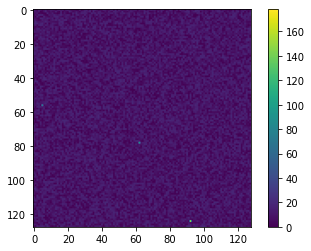

In [143]:
imageSeries = []

for imageNum in range(1):
    imageSeries.append(cs.getSimulatedImage(zerosarray, size, [1,1], shapeIn3D))
    #np.save('noisesim.npy', imageSeries)
    reportProgress(imageNum, 1)
    
plt.imshow(imageSeries[0])
plt.colorbar()


In [ ]:
np.load('noisesim.npy', allow_pickle=True)